# Imports

In [1]:
# Imports
import warnings
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import lasso_path
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV


# Ignora todos los FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Funciones

In [28]:
def plot_scatter_variables(df, target, variables=None):
    if variables is None:
        variables = [col for col in df.columns if col != target]

    num_vars = len(variables)
    cols = 3  # Número de columnas en la cuadrícula de subplots
    rows = (num_vars // cols) + (num_vars % cols > 0)  # Ajustar número de filas
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()  # Convertimos en un array 1D para indexar fácilmente

    for i, var in enumerate(variables):
        sns.scatterplot(x=df[var], y=df[target], ax=axes[i], alpha=0.6)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(target)
        axes[i].set_title(f'{var} vs {target}')
    
    # Ocultar ejes vacíos si sobran
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    
def plot_correlation_heatmap(df, method = None):
    if method is None:
        # Calculamos la matriz de correlación entre las variables numéricas
        corr_matrix = df.corr()
    else:
        corr_matrix = df.corr(method = method)
    # Dibujamos el heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, cbar=True)
    plt.title('Correlación entre las Variables')
    plt.show()

# Explicación de las variables


### MSSubClass: Identifies the type of dwelling involved in the sale.

| Code | Dwelling Type                                   | Tipo de Vivienda                         |
|------|-------------------------------------------------|------------------------------------------|
| 20   | 1-STORY 1946 & NEWER ALL STYLES                 | 1-PLANTA 1946 Y MÁS NUEVO, TODOS LOS ESTILOS |
| 30   | 1-STORY 1945 & OLDER                           | 1-PLANTA 1945 Y MÁS ANTIGUO              |
| 40   | 1-STORY W/FINISHED ATTIC ALL AGES              | 1-PLANTA CON ÁTICO TERMINADO, TODAS LAS EDADES |
| 45   | 1-1/2 STORY - UNFINISHED ALL AGES              | 1-1/2 PLANTA - SIN TERMINAR, TODAS LAS EDADES |
| 50   | 1-1/2 STORY FINISHED ALL AGES                  | 1-1/2 PLANTA TERMINADA, TODAS LAS EDADES |
| 60   | 2-STORY 1946 & NEWER                           | 2-PLANTAS 1946 Y MÁS NUEVO               |
| 70   | 2-STORY 1945 & OLDER                           | 2-PLANTAS 1945 Y MÁS ANTIGUO             |
| 75   | 2-1/2 STORY ALL AGES                           | 2-1/2 PLANTA, TODAS LAS EDADES           |
| 80   | SPLIT OR MULTI-LEVEL                           | NIVEL DIVIDIDO O MULTINIVEL              |
| 85   | SPLIT FOYER                                    | DIVISIÓN CON VESTÍBULO                   |
| 90   | DUPLEX - ALL STYLES AND AGES                   | DUPLEX - TODOS LOS ESTILOS Y EDADES      |
| 120  | 1-STORY PUD (Planned Unit Development) - 1946 & NEWER | 1-PLANTA PUD (Desarrollo de Unidad Planificada) - 1946 Y MÁS NUEVO |
| 150  | 1-1/2 STORY PUD - ALL AGES                     | 1-1/2 PLANTA PUD - TODAS LAS EDADES      |
| 160  | 2-STORY PUD - 1946 & NEWER                     | 2-PLANTAS PUD - 1946 Y MÁS NUEVO         |
| 180  | PUD - MULTILEVEL - INCL SPLIT LEV/FOYER        | PUD - MULTINIVEL - INCLUYE NIVEL DIVIDIDO/FOYER |
| 190  | 2 FAMILY CONVERSION - ALL STYLES AND AGES      | CONVERSIÓN A 2 FAMILIAS - TODOS LOS ESTILOS Y EDADES |

### MSZoning: Identifies the general zoning classification of the sale.

| Code | Zoning Type                                  | Tipo de Zonificación                      |
|------|----------------------------------------------|-------------------------------------------|
| A    | Agriculture                                  | Agricultura                               |
| C    | Commercial                                   | Comercial                                 |
| FV   | Floating Village Residential                 | Residencial en Isla Flotante              |
| I    | Industrial                                   | Industrial                                |
| RH   | Residential High Density                     | Residencial Alta Densidad                 |
| RL   | Residential Low Density                      | Residencial Baja Densidad                 |
| RP   | Residential Low Density Park                 | Residencial Parque de Baja Densidad       |
| RM   | Residential Medium Density                   | Residencial de Densidad Media             |

### LotFrontage: Linear feet of street connected to property

### LotArea: Lot size in square feet

### Street: Type of road access to property

| Code | Street Type  | Tipo de Calle |
|------|--------------|---------------|
| Grvl | Gravel       | Grava         |
| Pave | Paved        | Pavimentada   |

### Alley: Type of alley access to property

| Code | Alley Type   | Tipo de Acceso al Callejón |
|------|--------------|----------------------------|
| Grvl | Gravel       | Grava                      |
| Pave | Paved        | Pavimentado                |
| NA   | No alley access | Sin acceso al callejón   |

### LotShape: General shape of property

| Code | Shape Type    | Tipo de Forma |
|------|---------------|---------------|
| Reg  | Regular       | Regular       |
| IR1  | Slightly irregular | Ligeramente irregular |
| IR2  | Moderately Irregular | Moderadamente irregular |
| IR3  | Irregular     | Irregular     |

### LandContour: Flatness of the property

| Code | Contour Type  | Tipo de Contorno |
|------|---------------|------------------|
| Lvl  | Near Flat/Level | Nivelado       |
| Bnk  | Banked - Quick and significant rise from street grade to building | Bancada - Ascenso rápido y significativo |
| HLS  | Hillside - Significant slope from side to side | Ladera - Pendiente significativa de lado a lado |
| Low  | Depression    | Depresión       |

### Utilities: Type of utilities available

| Code  | Utility Type   | Tipo de Utilidad |
|-------|----------------|------------------|
| AllPub | All public Utilities (E,G,W,& S) | Todos los servicios públicos (electricidad, gas, agua y alcantarillado) |
| NoSewr | Electricity, Gas, and Water (Septic Tank) | Electricidad, gas y agua (tanque séptico) |
| NoSeWa | Electricity and Gas Only | Solo electricidad y gas |
| ELO    | Electricity only | Solo electricidad |

### LotConfig: Lot configuration

| Code    | Configuration Type | Tipo de Configuración |
|---------|--------------------|-----------------------|
| Inside  | Inside lot         | Lote interior         |
| Corner  | Corner lot         | Lote en esquina       |
| CulDSac | Cul-de-sac         | Callejón sin salida  |
| FR2     | Frontage on 2 sides of property | Frente a 2 lados de la propiedad |
| FR3     | Frontage on 3 sides of property | Frente a 3 lados de la propiedad |

### LandSlope: Slope of property

| Code | Slope Type      | Tipo de Pendiente |
|------|-----------------|-------------------|
| Gtl  | Gentle slope    | Pendiente suave   |
| Mod  | Moderate Slope  | Pendiente moderada|
| Sev  | Severe Slope    | Pendiente severa  |

### Neighborhood: Physical locations within Ames city limits

| Code    | Neighborhood Type  | Tipo de Vecindario    |
|---------|--------------------|-----------------------|
| Blmngtn | Bloomington Heights| Alturas de Bloomington|
| Blueste | Bluestem            | Bluestem              |
| BrDale  | Briardale           | Briardale             |
| BrkSide | Brookside           | Brookside             |
| ClearCr | Clear Creek        | Clear Creek           |
| CollgCr | College Creek      | College Creek         |
| Crawfor | Crawford           | Crawford              |
| Edwards | Edwards            | Edwards               |
| Gilbert | Gilbert            | Gilbert               |
| IDOTRR  | Iowa DOT and Rail Road | Iowa DOT y Ferrocarril |
| MeadowV | Meadow Village     | Villa Meadow          |
| Mitchel | Mitchell           | Mitchell              |
| Names   | North Ames         | Ames Norte            |
| NoRidge | Northridge         | Northridge            |
| NPkVill | Northpark Villa    | Villa Northpark       |
| NridgHt | Northridge Heights | Alturas Northridge    |
| NWAmes  | Northwest Ames     | Ames Noroeste         |
| OldTown | Old Town           | Ciudad Vieja          |
| SWISU   | South & West of Iowa State University | Sur y Oeste de la Universidad Estatal de Iowa |
| Sawyer  | Sawyer             | Sawyer                |
| SawyerW | Sawyer West        | Sawyer Oeste          |
| Somerst | Somerset           | Somerset              |
| StoneBr | Stone Brook        | Stone Brook           |
| Timber  | Timberland         | Tierra Forestal       |
| Veenker | Veenker            | Veenker               |

### Condition1: Proximity to various conditions

| Code   | Condition Type  | Tipo de Condición |
|--------|-----------------|-------------------|
| Artery | Adjacent to arterial street | Adyacente a calle principal |
| Feedr  | Adjacent to feeder street | Adyacente a calle secundaria |
| Norm   | Normal          | Normal            |
| RRNn   | Within 200' of North-South Railroad | A 200' de ferrocarril Norte-Sur |
| RRAn   | Adjacent to North-South Railroad | Adyacente al ferrocarril Norte-Sur |
| PosN   | Near positive off-site feature--park, greenbelt, etc. | Cerca de una característica positiva fuera del sitio (parque, zona verde, etc.) |
| PosA   | Adjacent to positive off-site feature | Adyacente a una característica positiva fuera del sitio |
| RRNe   | Within 200' of East-West Railroad | A 200' de ferrocarril Este-Oeste |
| RRAe   | Adjacent to East-West Railroad | Adyacente al ferrocarril Este-Oeste |

### Condition2: Proximity to various conditions (if more than one is present)

| Code   | Condition Type  | Tipo de Condición |
|--------|-----------------|-------------------|
| Artery | Adjacent to arterial street | Adyacente a calle principal |
| Feedr  | Adjacent to feeder street | Adyacente a calle secundaria |
| Norm   | Normal          | Normal            |
| RRNn   | Within 200' of North-South Railroad | A 200' de ferrocarril Norte-Sur |
| RRAn   | Adjacent to North-South Railroad | Adyacente al ferrocarril Norte-Sur |
| PosN   | Near positive off-site feature--park, greenbelt, etc. | Cerca de una característica positiva fuera del sitio (parque, zona verde, etc.) |
| PosA   | Adjacent to positive off-site feature | Adyacente a una característica positiva fuera del sitio |
| RRNe   | Within 200' of East-West Railroad | A 200' de ferrocarril Este-Oeste |
| RRAe   | Adjacent to East-West Railroad | Adyacente al ferrocarril Este-Oeste |



# Cargamos los datos

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv('sample_submission.csv')

In [12]:
# Comprobamos que se hayan cargado correctamente los datos
print(train_df.head())
print(test_df.head())
print(sample_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

# EDA

In [11]:
print("Shape", end=": ")
print(train_df.shape, test_df.shape, sample_df.shape)

Shape: (1460, 81) (1459, 80) (1459, 2)


## .head()


In [13]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## .describre()

In [18]:
train_df.describe(include='all')
# train_df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


## .info()

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Histograma


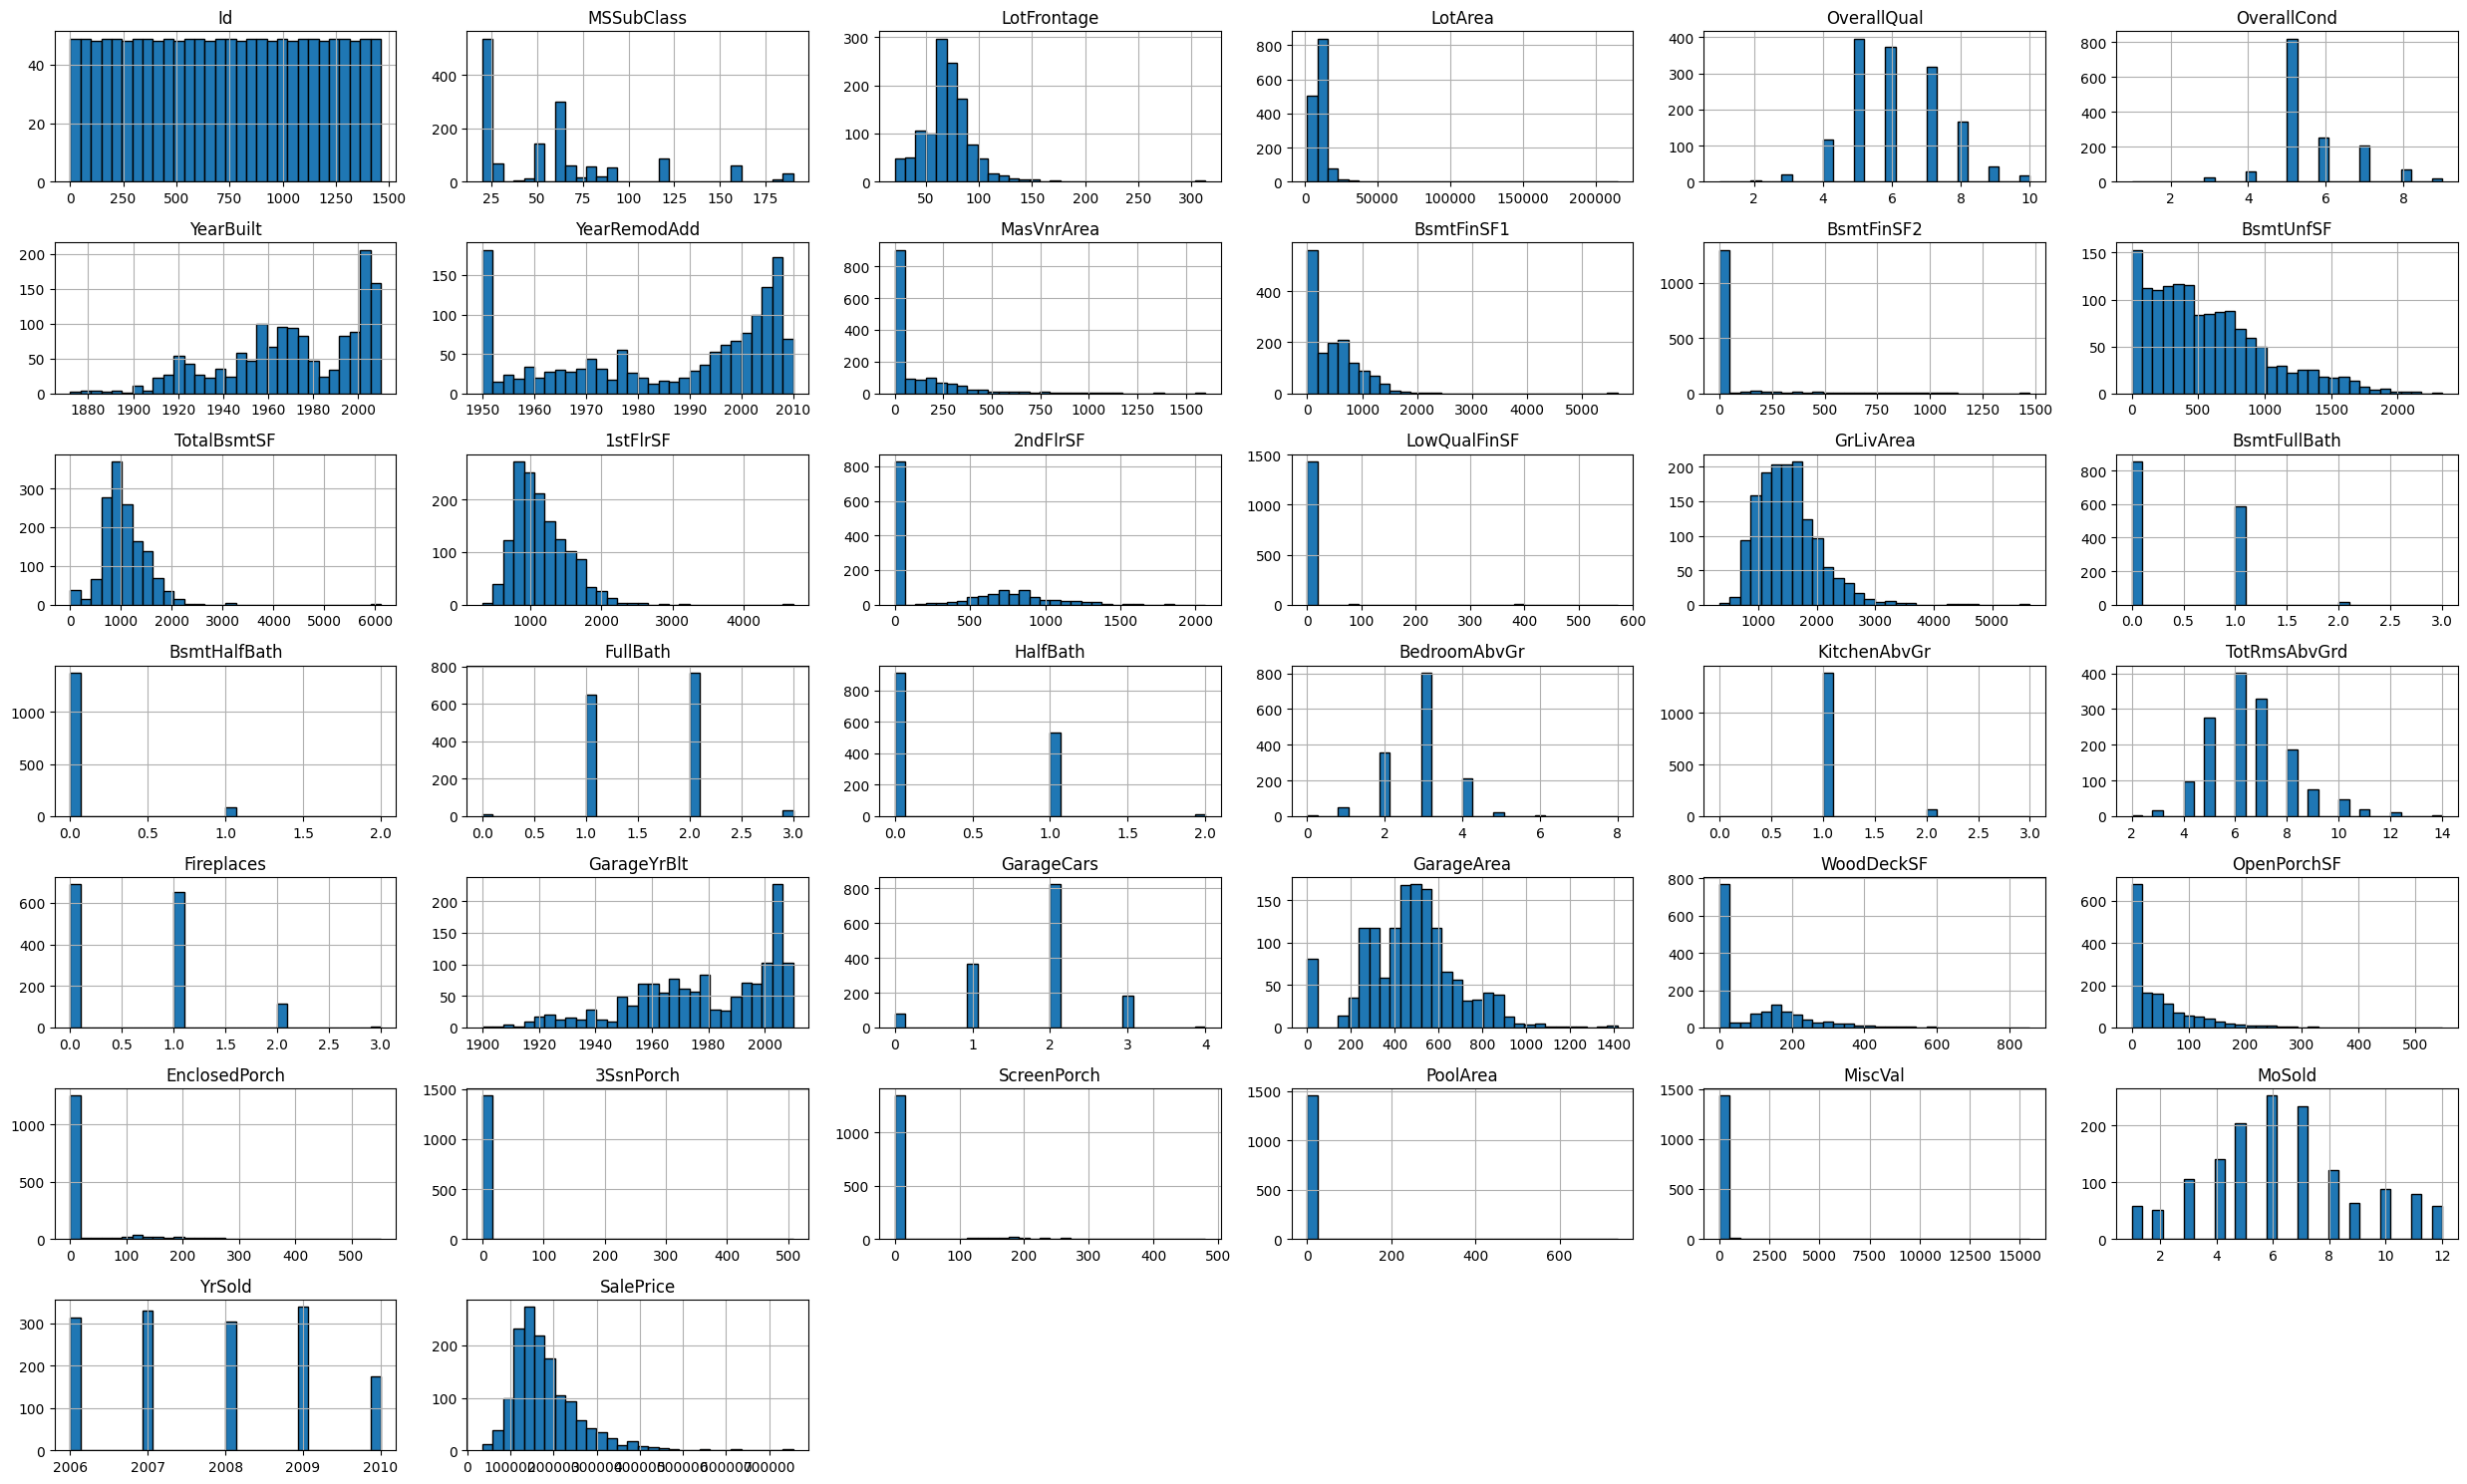

In [ ]:
# Configuración del tamaño de las gráficas
train_df.hist(bins=30, figsize=(25, 15), edgecolor='black')
plt.tight_layout()
plt.show()

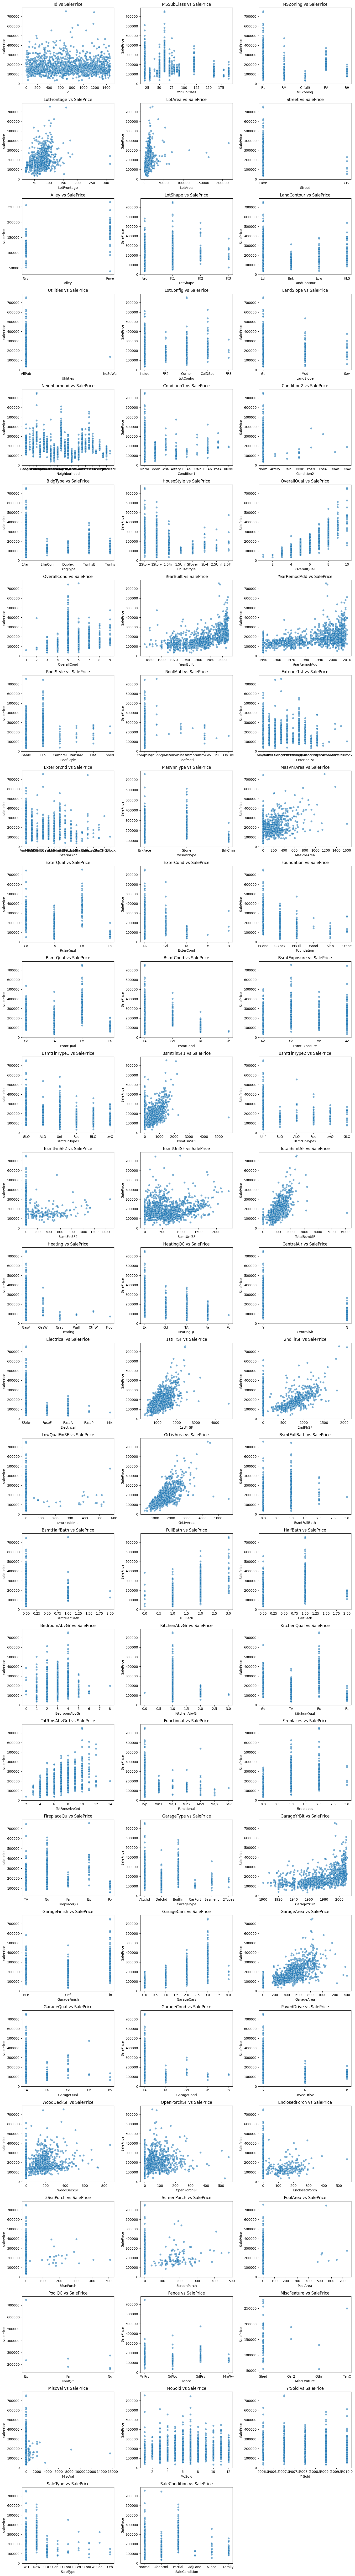

In [30]:
plot_scatter_variables(train_df, target='SalePrice')